### Modal SNA MAP473D, Ecole Polytechnique, 2022-23

# TP4 - Processus de Poisson : transformation de Esscher, splitting et MCMC




***
**Soumission du TP pour évaluation:** 
- Remplir ce notebook et déposer sur le moodle le fichier notebook ".ipynb" ainsi qu'une sauvegarde (export) au format ".html".
- Les réponses aux questions théoriques peuvent être saisies (en latex) dans le notebook; un (seul) fichier au format .pdf contenant le scan de vos réponses manuscrites est aussi accepté.
- Les dépôts sur le moodle doivent être faits avant le vendredi 31 mars, 18h. 
***

**Noms du binôme :** Mouhamadou Lamine Thiaw et Faraji Ossama

$\def\R{\mathbb{R}}$
$\def\E{\mathbb{E}}$
$\def\P{\mathbb{P}}$
$\def\eqdef{:=}$

Quelques rappels en python :

- `random.exponential` du module `numpy`. Pour la simulation de v.a. exponentielles. <font color='blue'>Attention à la convention sur les paramètres</font>.
- `random.poisson` du module `numpy`. Pour la simulation de v.a. de Poisson.
- `poisson.sf` du module `scipy.stats`. Pour la fonction de survie d'une v.a. de Poisson.
- `random.standard_cauchy` du module `numpy`. Pour la simulation de v.a. de Cauchy standards.
- `cumsum` du module `numpy`.  Pour le calcul de la somme cumulée des éléments d'un tableau.
- `sort` du module `numpy`. Pour ordonner les éléments d'un tableau.
- `boxplot` du module `matplotlib.pyplot`. Pour tracer des boîtes à moustaches (boxplots).

Représentation d'un array `numpy` par un <b>boxplot</b> :  affichage d'une boîte rectangulaire délimitée par les premier et troisième quartiles ; la  barre intérieure (rouge) donne la médiane ; la "moustache" inférieure va jusqu'à la valeur la plus petite située entre le premier quartile et 1.5 fois la hauteur de la boîte; la "moustache" supérieure va jusqu'à la valeur le plus grande située entre le troisième quartile et 1.5 fois la hauteur de la boîte. Les éventuels points de l'échantillon au-delà des moustaches sont représentés par des "+".

## 1. Simulation d'un processus  de Poisson homogène et composé

### 1.1. Rappels : Processus de Poisson


Soit $\lambda >0$.
Un <b>processus de Poisson homogène de paramètre $\lambda$</b> est un processus
$(N_t)_{t\geq 0}$ issu de $0$, à accroissement indépendants, tel que pour tout
$0 \leq s < t$, $N_t-N_s$ suit une loi de Poisson de paramètre $\lambda(t-s)$.

Ce processus peut être obtenu en posant
$$N_t = \textrm{Card}\{k\geq 1~: T_k\leq t\} = \sum_{k \geq 1} \mathbf{1}_{T_k \leq t};$$
par convention, $T_0 =0$ et pour tout $k \geq 1$,  $T_k= T_{k-1} + E_k$,  pour des v.a. $(E_i)_{i \geq 1}$ i.i.d. de loi exponentielle de paramètre $\lambda$ : les durées "inter-saut"  $(T_k - T_{k-1})_{k \geq 1}$ sont i.i.d. de loi exponentielle de paramètre $\lambda$.

Soit $\lambda >0$ et $\nu$ une loi de probabilité sur $\mathbb{R}$. Un <b>processus
  de Poisson composé de paramètres $(\lambda, \nu)$</b> est un processus $(X_t)_{t\geq
  0}$ défini par
$$X_t = \sum_{k=1}^{N_t} Y_k,$$
où les sauts $(Y_k)_{k \geq 1}$ sont des v.a. réelles i.i.d. de loi $\nu$
indépendantes de $(N_t)_{t \geq 0}$, processus de Poisson homogène de paramètre
$\lambda$.


### 1.2. Simulations d'un processus de Poisson 

##### Simulation d'une trajectoire sur $[0,T_n]$, $n$ fixé 
Utiliser le fait que 
$$N_t = \begin{cases}0&\textrm{pour $t\in [0, T_1[$,}\\
  1&\textrm{pour $t\in [T_1, T_2[$,}\\
  2&\textrm{pour $t\in [T_2, T_3[$,}\\
  \vdots &\quad\vdots\end{cases}$$
et que les instants de sauts $(T_k)_{1
  \leq k \leq n}$ s'expriment à l'aide de tirages de la loi exponentielle. 

#####  Simulation d'une trajectoire sur $[0,T]$, $T$ fixé 
Utiliser la loi de $N_T$ puis le fait que, conditionnellement à l'événement $\{N_T = k \}$, la loi des instants de sauts $(T_1, \cdots, T_k)$ est la loi de $k$ v.a. uniformes sur $[0,T]$ ordonnées (cf. Amphi 3). 

Pour l'affichage d'une fonction en escalier, on pourra utiliser la fonction `step` de `matplotlib.pyplot` (nous vous conseillons de consulter la documentation de cette fonction, notamment pour comprendre le rôle de son argument "`where`").  

##### Question 1
En utilisant ces deux approches, simuler et tracer sur une même figure une trajectoire d'un processus de Poisson homogène jusqu'à l'instant $T_n$ d'une part (pour $n\ge 1$ fixé), et une trajectoire jusqu'à l'instant $T$ d'autre part (pour $T>0$ fixé). On pourra par exemple prendre $n=30$, $\lambda=3$ et $T=n/\lambda=10$.

##### _Réponse :_

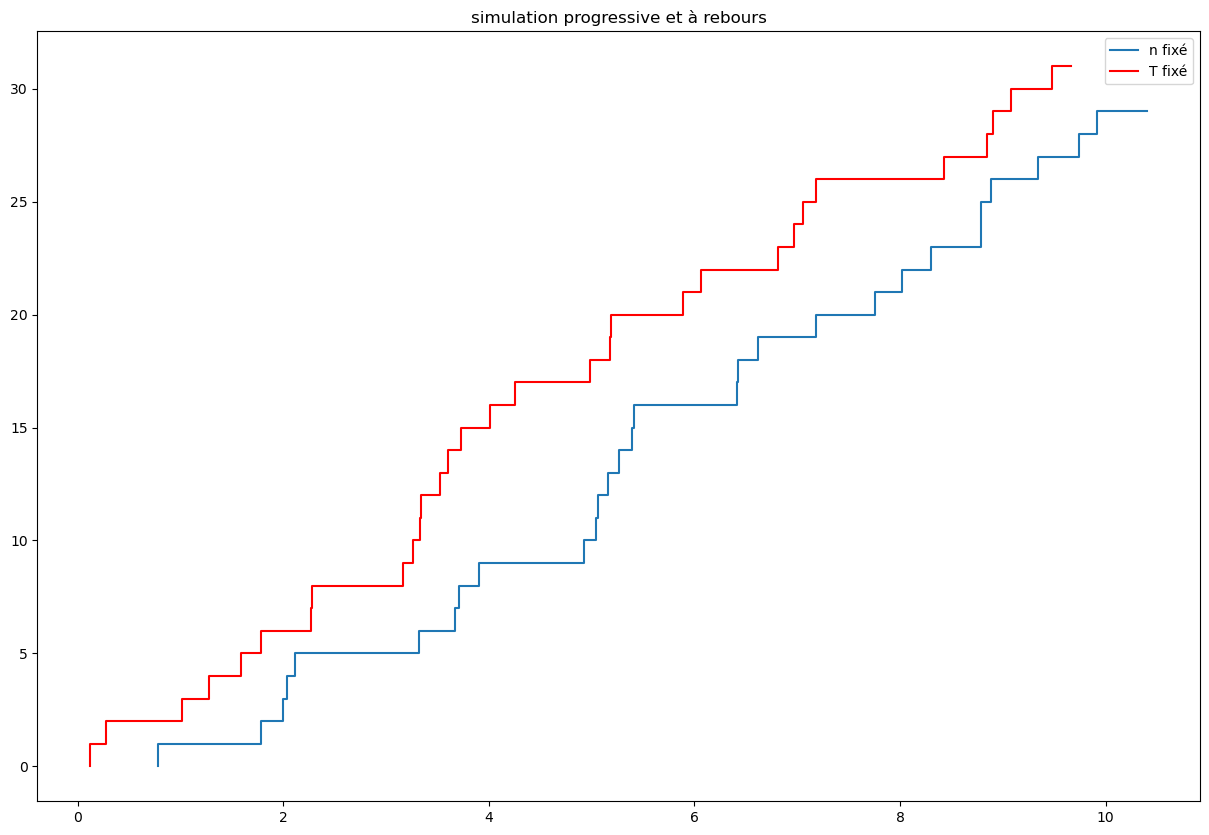

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import random
#print("Simulation d'une trajectoire sur $[0,T_n]$, $n$ fixé") 
def N(n,l):
    T_i,T=0,[]
    for k in range(n):
        T_i+=np.random.exponential(1/l)
        T+=[T_i]
    #print(len(T))
    return T

plt.figure(figsize=(15, 10))


l=3
n=30
T=int(n/l)

plt.step(N(n,l),np.arange(n),label="n fixé")

#print(" Simulation à rebours.")

Nt=np.random.poisson(l*T)
U=np.random.uniform(0,T,Nt)
U.sort()
plt.step(U,np.arange(Nt),c="r",label="T fixé")
plt.title('simulation progressive et à rebours')
plt.legend(loc="best")
plt.show()



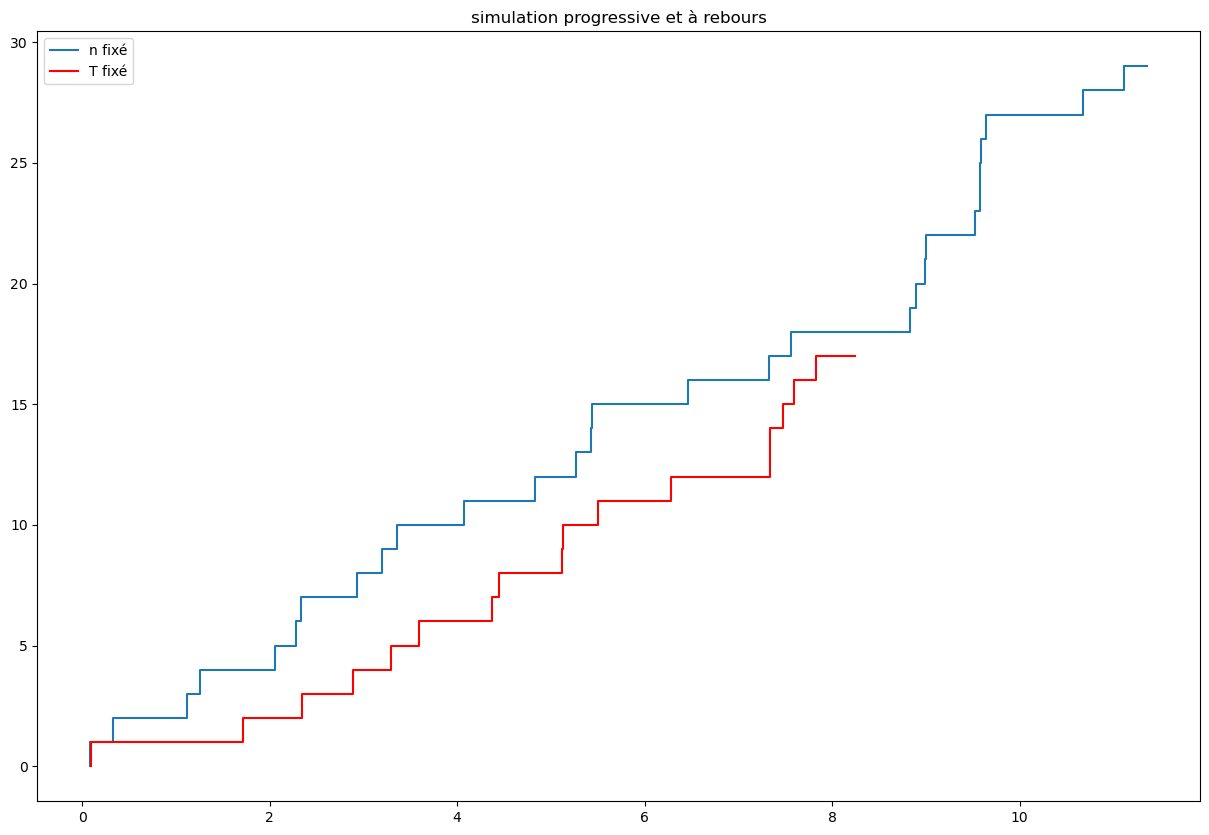

In [2]:
plt.figure(figsize=(15, 10))


l=3
n=30
T=int(n/l)

plt.step(N(n,l),np.arange(n),label="n fixé")

#print(" Simulation à rebours.")

Nt=np.random.poisson(l*T)
U=np.random.uniform(0,T,Nt)
U.sort()
plt.step(U,np.arange(Nt),c="r",label="T fixé")
plt.title('simulation progressive et à rebours')
plt.legend(loc="best")
plt.show()
    

### 1.2. Simulations d'un processus de Poisson composé

##### Question 2  
Adapter le code précédent pour tracer deux trajectoires d'un processus de Poisson composé sur $[0,T]$ : pour la loi des sauts $(Y_k)_{k\ge 1}$, on envisagera successivement 
* une loi exponentielle (par exemple de moyenne 2), 
* puis la loi de la valeur absolue d'une v.a. de Cauchy standard.  

Quelle différence remarque-t-on dans la régularité de l'amplitude des sauts ? 

##### _Réponse :_

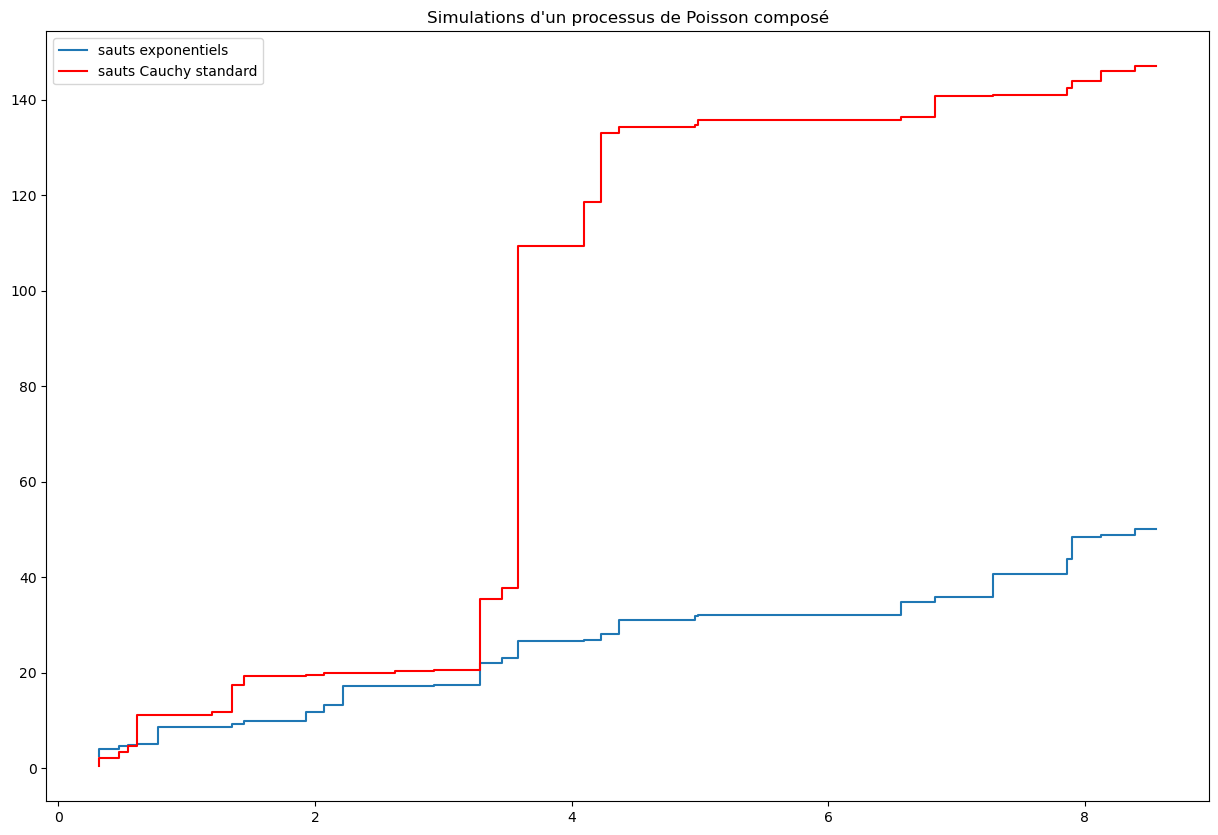

In [3]:
#sauts exponentiels
plt.figure(figsize=(15, 10))

plt.figure(1)
S=np.cumsum(np.random.exponential(2,len(N(n,l))))
temp=N(n,l)
plt.step(temp,S,label = "sauts exponentiels")
plt.title("Simulations d'un processus de Poisson composé")
#plt.figure(figsize=(15, 10))

#Sauts de loi de Cauchy
#plt.figure(2)
C=np.cumsum(np.abs(np.random.standard_cauchy(len(temp))))
plt.step(temp,C,c='r',label = "sauts Cauchy standard")
plt.legend(loc="best")

plt.show()
#plt.title("sauts Cauchy standard")

On observe que les sauts du processus composé Cauchy sont plus irréguliers que ceux de la loi exponentielle. Nous inférons que cela est lié au fait que les variables de cauchy standard ne sont pas integrables, c'est à dire que leurs moyennes n'est pas bornée.

## 2. Changement de probabilité pour les processus de Poisson composés

Soient $\lambda >0$, $\nu$ une loi de probabilité sur $\R$, et $(\Omega, \mathcal{F}, \P)$ un espace de probabilité. Sous $\P$ : les v.a. $(Y_k)_{k \geq 1}$ sont i.i.d. de loi
  $\nu$ et indépendantes de $(N_t)_{t \geq 0}$, processus de Poisson homogène
  de paramètre $\lambda$. Par suite, sous $\P$, $$ \tag{1} X_t : = \sum_{k=1}^{N_t} Y_k$$ est un processus de Poisson composé de paramètres $(\lambda, \nu)$. $\E$ et $\mathbb{V}$ désignent respectivement l'espérance et la variance sous $\P$.
  
On s'intéresse au calcul de $$\tag{2} I := \mathbb{P}(X_T >x)$$ dans le cas où $\nu$ est la mesure de Dirac en $\alpha>0$, c'est-à-dire $\mathbb{P}(Y_1 =\alpha) =1$; et le cas où   $x > \E[X_T]$.  On a donc tout simplement $X_t = \alpha \,  N_t$ pour tout $t\geq 0$. 

 
 

##### Question 3 
Pour tout $\theta \in \R$, calculer  $\Gamma_T(\theta)$ définie par 
$$\Gamma_T(\theta):= \log \mathbb{E}[\exp({\theta X_T})].$$ 
__a)__  En déduire l'expression de l'espérance et la variance de $X_T$ sous $\mathbb{P}$, en fonction de $\alpha$, $\lambda$ et $T$. 

__rep a__ : a) Pour tout $\theta \in \R$, on a :

\begin{align*}
\Gamma_T(\theta) &= \log \mathbb{E}[\exp({\theta X_T})]\
&= \log \mathbb{E}[\exp({\theta \alpha N_T})]\
&= \log \mathbb{E}[\exp({(\theta \alpha) \sum_{k=1}^{N_T} 1})]\
&= \log \mathbb{E}[\exp({(\theta \alpha) N_T})^{1}]\
&= \log M_{N_T}(\theta \alpha) \
&= \lambda T \left( e^{\theta \alpha} -1\right),
\end{align*}
où $M_{N_T}(\theta) = \mathbb{E}\left[ e^{\theta N_T} \right]$ est la fonction génératrice des moments de $N_T$. Ainsi, en dérivant deux fois $\Gamma_T(\theta)$, on trouve

\begin{align*}
\Gamma_T''(\theta) &= \alpha^2 \lambda T e^{\theta \alpha} \geq 0.
\end{align*}


En dérivant une fois $\Gamma_T(\theta)$, on a

\begin{align*}
\Gamma_T'(\theta) = \alpha \lambda T e^{\theta \alpha}.
\end{align*}
En évaluant $\Gamma_T'(\theta)$ en $\theta =0$, on trouve

\begin{align*}
\Gamma_T'(0) = \alpha \lambda T.
\end{align*}
On en déduit l'espérance et la variance de $X_T$ sous $\mathbb{P}$ :

\begin{align*}
\mathbb{E}[X_T] &=  \alpha \lambda T,\
\mathbb{V}[X_T] &=  \alpha^2 \lambda T.
\end{align*}

__b)__  Commenter la monotonie en la variable $\alpha$ de ces quantités.

__rep b__ : les deux quantités sont croissantes en $\alpha$,


### 2.1. Rappel de cours : la transformation de Esscher
Pour toute fonction $f: \mathbb{R} \to \mathbb{R}$ mesurable telle que $ \mathbb{E}\left[ \exp(f(Y_1)) \right]< \infty$, on définit
$$ \lambda_f:= \lambda  \, \mathbb{E}\left[ \exp(f(Y_1)) \right] = \lambda \, \int \exp(f(y))  \, \nu(\mathrm{d} y )  \qquad \nu_f(\mathrm{d} y ) :=  \frac{\exp(f(y))}{\mathbb{E}\left[ \exp(f(Y_1)) \right]}\, \nu(\mathrm{d} y ).
$$

Alors, nous avons pour toute fonction mesurable bornée $h: \R \to \R$ et tout $t \geq 0$ (voir Amphi 3)
$$\tag{3}
\E\left[h(X_t) \right] = \exp\left\{ \lambda t \left(  \mathbb{E}\left[ \exp(f(Y_1)) \right]-1 \right) \right\}  \ \E_f\left[ h(X_t) \ \exp\left\{ - \sum_{k=1}^{N_t} f(Y_k) \right\} \right]
$$
où  sous $\P_f$ :  les v.a. $(Y_k)_{k \geq 1}$ sont i.i.d. de loi $\nu_f$, indépendantes de $(N_t)_{t \geq 0}$ qui est un processus de Poisson homogène de paramètre $\lambda_f$. 


### 2.2. Cas des lois  _penchées_
Considérons le changement de loi induit par la fonction $f_\theta: y \mapsto \theta y$, pour un réel $\theta$ fixé. Dans toute la suite, pour $\theta \in \R$, on notera respectivement  $\lambda_\theta,
 \nu_\theta, \P_\theta$ les quantités $\lambda_{f_\theta}, \nu_{f_\theta}, \P_{f_\theta}$. Enfin,
 $\mathbb{E}_\theta$ désigne l'espérance sous $\mathbb{P}_\theta$.

##### Question 4  (interprétation du changement de loi)
__a)__  Donner l'expression de la quantité $\mathbb{E}\left[ \exp(f(Y_1)) \right] = \mathbb{E}\left[ \exp(\theta \, Y_1) \right]$, et en déduire $\lambda_\theta$ et $\nu_\theta$ en fonction de $\alpha, \theta$.

__b)__  Sous $\P_\theta$ : quelle est la loi de $(N_t)_{t \geq 0}$, celle des $(Y_k)_k$ puis celle de $(X_t)_{t \geq 0}$.

__c)__ Si l'on choisit $\theta>0$, que favorise-t-on par ce changement de loi ? (de façon symétrique, que favorise-t-on en prenant $\theta <0$ ?)

__d)__ Sous $\P_\theta$, quelles sont l'espérance et la variance de $X_T$ ? (comparer cette valeur au résultat de la question 3)

##### _Réponse :_
__rep a__: $\mathbb{E}\left[ \exp(f(Y_1)) \right] = \mathbb{E}\left[ \exp(\theta \, Y_1) \right] = exp(\alpha \theta)$ et donc : $$\lambda_\theta = \lambda exp(\alpha \theta)$$ et $$\nu_\theta(dy)=\nu(dy)exp(\theta(y-\alpha))$$

__rep b__: Sous $\P_\theta$ :  $(N_t)_{t \geq 0}$ est une Poisson homogène de parametre $\lambda_\theta$ ,  $(Y_k)_k$ de loi la mesure de Dirac en $\theta\alpha$ et $(X_t)_{t \geq 0}$ est un PP homegène de parametres $(\lambda_\theta ,\nu_\theta)$.

__rep c__: Sous $\P_\theta$, $\mathbb{E}[X_T]=$

##### Question 5 (calcul du ratio d'importance et étude de l'estimateur IS).

En utilisant (3), donner l'expression en fonction de  $X_T, \theta, \Gamma_T(\theta)$, d'une v.a.
  $W_{\theta,T}$ telle que pour toute fonction mesurable bornée $h :\mathbb{R} \rightarrow \mathbb{R}$ on ait
  
$$
\tag{4}
\mathbb{E}\left[ h(X_T) \right] = \mathbb{E}_\theta \left[ h(X_T) \  W_{\theta,T}\right].
$$


Donner l'expression d'un estimateur par échantillonnage d'importance $\hat I_{*,M}$ basé sur $M$ simulations i.i.d. $X_T^{(k)}$ sous $\mathbb{P}_\theta$, de la quantité inconnue $I$ (voir (2)). 

Montrer que $\hat I_{*,M}$ est asymptotiquement normal, et expliciter la variance asymptotique - notée $\sigma_*^2$. 

Proposer un estimateur $\hat\sigma^2_{*,M}$ de cette variance construit à l'aide des $X_T^{(k)}$ et en déduire une estimation par intervalle de confiance asymptotique (au niveau $95\%$) de $I$. 

##### _Réponse :_
$$
\mathbb{E}\left[ h(X_T) \right] = \mathbb{E}_\theta \left[ h(X_T) \  W_{\theta,T}\right]
$$
$$
W_{\theta,T} =exp(\lambda T \left( e^{\theta \alpha} -1\right) -\theta X_T) = exp(\theta X_T - \Gamma_T(\theta)).
$$

L'estimateur par échantillonnage d'importance est donné par :
$$
\hat{I}_{*, M}=\frac{1}{M} \sum_{k=1}^M h\left(X_T^{(k)}\right) \frac{\mathbb{P}\left(X_T^{(k)}>x\right)}{\mathbb{P}_\theta\left(X_T^{(k)}>x\right)}
$$ on peut réécrire cet estimateur comme :
$$
\hat{I}_{*, M}=\frac{1}{M} \sum_{k=1}^M h\left(X_T^{(k)}\right) W_{\theta, T}^{(k)} \frac{\mathbb{P}\left(X_T^{(k)}>x\right)}{\mathbb{P}_\theta\left(X_T^{(k)}>x\right)}
$$

Pour montrer que $\hat I_{*,M}$ est asymptotiquement normal, on va appliquer le théorème central limite (TCL) à la suite $(h(X_T^{(k)}) W_{\theta,T}^{(k)}(\mathbb{P}(X_T^{(k)}>x) / \mathbb{P}\theta(X_T^{(k)}>x)){k=1}^M$. Pour cela, on va vérifier les conditions du TCL, on peut conclure que $\sqrt{M}(\hat I_{,M} - \mu)$ converge en loi vers une variable normale de moyenne $0$ et de variance $\sigma_^2$, où $\sigma_^2$ est la variance asymptotique de $\hat I_{,M}$.

L'expression de $\sigma_*^2$ peut être obtenue en utilisant la formule de la variance de la somme pondérée de variables aléatoires :

En utilisant l'indépendance des variables $X_T$ et $

##### Question 6 (Choix de $\theta$)
Il reste à choisir la valeur de $\theta$.

__a)__ Résoudre l'équation $\Gamma'_T(\theta)=x$ sur $\R$. On notera $\theta_x$ cette solution. 

__b)__ Comment interprétez-vous ce choix de $\theta$  (voir question 3-a)) ? 

__c)__ Quel est le signe de $\theta_x$ ? on rappelle que l'on s'intéresse au cas $x > \E[X_T]$.



##### _Réponse :_
__rep a__: Calcul : $ \theta_x = \frac{1}{\alpha}*ln(\frac{x}{T\lambda\alpha})$

### 2.3. Application
Les processus de Poisson composés sont souvent utilisés pour modéliser l'état de la comptabilité des compagnies d'assurance. En effet, si une compagnie d'assurance de capital initial $C$ reçoit à chaque unité de temps des cotisations d'une valeur de $\Lambda$ et doit
effectuer des dédommagements de loi $\nu$ répartis dans le temps selon un processus de Poisson d'intensité $\lambda$, alors ses liquidités, à toute date $t$,
sont données par $$C+\Lambda t-X_t,$$
où $(X_t)_{t \geq 0}$ est un processus de Poisson composé d'intensité $\lambda$ et de sauts de loi $\nu$ sur $\mathbb{R}_+$. Afin d'éviter le risque de faillite, la compagnie d'assurance est alors amenée à évaluer $\mathbb{P}(X_T>x)$ pour des valeurs de $x$ élevées.

##### Question 7  
Les valeurs de $x$ qui rendent l'événement $\{X_T>x\}$ rare sous $\mathbb{P}$
  seront de la forme
$$
\tag{5} x=\mathbb{E}[X_T]+\rho\sqrt{\mathbb{V}(X_T)},$$
pour $\rho>0$ grand. 



Comparer la méthode de Monte Carlo naïve et la méthode d'échantillonnage d'importance issue de la relation (4) lorsque $\theta = \theta_x$, valeur trouvée à la question 6 : 

__a)__  développer un code permettant d'observer la consistance des estimateurs 

__b)__ afficher une estimation de la quantité $I$ par intervalle de confiance asymptotique (de niveau $0.95$), pour chacune des deux méthodes. 

On prendra $T=1$, $\lambda=1$, $\nu= \delta_\alpha$ pour $\alpha =0.5$; et $x$ donné par (5) tout d'abord pour $\rho =1$, puis pour $\rho=5$ et $\rho =20$.

__c)__ Qu'est-il attendu du comportement de l'estimateur Monte Carlo naïf lorsque $\rho$ augmente ?

##### _Réponse :_

pour rho = 5, on trouve :
Estimateur naif: 0.0168 avec I.C [ 0.01641576811072971 , 0.017184231889270287 ]
Estimateur I.S: 0.01866207165184976 avec I.C [ 0.018632035819746654 , 0.018692107483952867 ]


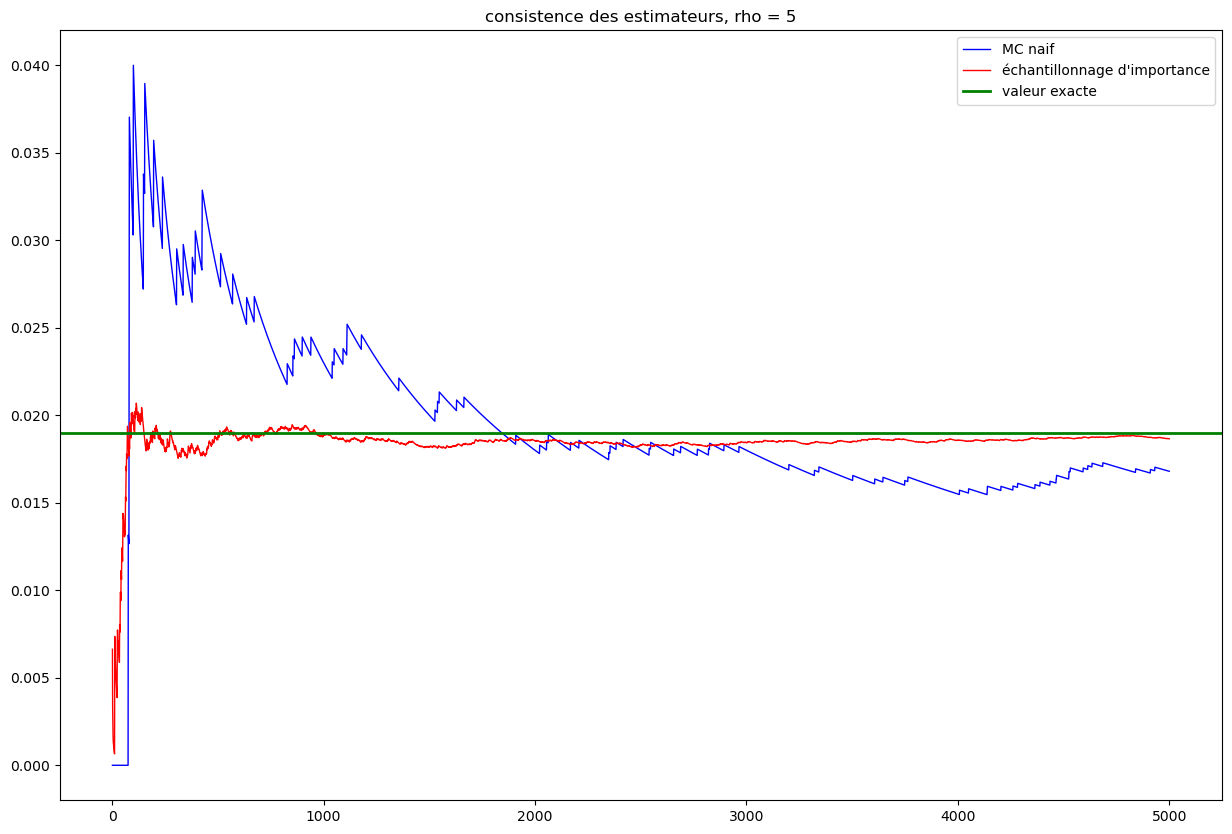

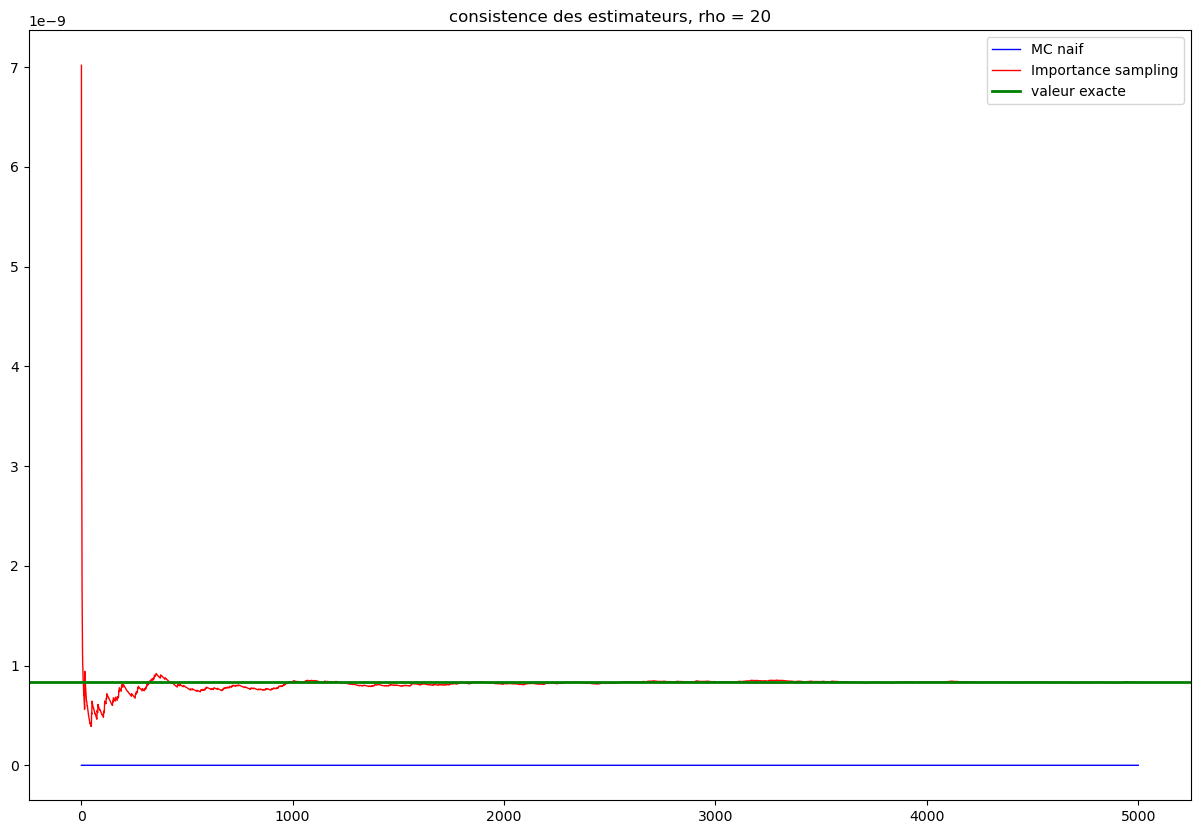

pour rho = 20, on trouve :
Estimateur naif: 0.0 avec I.C [ 0 , 0.0 ]
Estimateur I.S: 8.297833104312169e-10 avec I.C [ 8.297833103052188e-10 , 8.29783310557215e-10 ]


In [13]:
plt.figure(figsize=(15, 10))

T=1
l=1
a=0.5
n=int(5e3)
rho=5
def W(theta,x):
    #theta_x=(1/a)*np.log(x/(l*a*T)) 

    return np.exp(l*T*(np.exp(a*theta)-1)-theta*x)

plt.figure(1)
x=l*a*T+rho*l*(a**2)*T
theta_x=(1/a)*np.log(x/(l*a*T)) 



exact=sps.poisson.sf(x/a,l*T)

#Construction des estimateurs
#Estimateur MC naif
X_1=a*np.random.poisson(l*T,n)
Y_1=[X_1>x]

Y_avg=np.cumsum(Y_1)/np.arange(1,n+1)

plt.plot(range(1,n+1),Y_avg,c="b",label="MC naif",linewidth=1.0)


#Estimateur par I.S
X_2=a*np.random.poisson(l*T*np.exp(theta_x*a),n)
Y_2=np.array([X_2>x])*W(theta_x,X_2)
Y_avg2=np.cumsum(Y_2)/np.arange(1,n+1)
plt.plot(range(1,n+1),Y_avg2,c="r",label="échantillonnage d'importance",linewidth=1.0)
plt.axhline(y=exact,c="g",label="valeur exacte",linewidth=2.0)
plt.title(f"consistence des estimateurs, rho = {rho}")
plt.legend(loc="best")
#plt.show()


#Intervalles de confiance et estimateur
q=sps.norm.ppf(0.95)


var1=np.mean([X_1>x])-np.mean([X_1>x])**2
var2=np.mean(np.array([X_2>x])*np.exp(2*l*T*(np.exp(a*theta_x)-1)-2*theta_x*X_2))
I_naif,I_is=Y_avg[-1],Y_avg2[-1]


#IC
a1=I_naif -q*var1/(np.sqrt(n))
a2=I_naif +q*var1/(np.sqrt(n))
b1=I_is -q*var2/(np.sqrt(n))
b2=I_is +q*var2/(np.sqrt(n))

print(f"pour rho = {rho}, on trouve :")

print("Estimateur naif:",I_naif,"avec I.C [",max(0,a1),",",a2,"]")
print("Estimateur I.S:",I_is,"avec I.C [", max(b1,0) ,",", b2, "]")

plt.figure(figsize=(15, 10))

plt.figure(2)
rho=20

x=l*a*T+rho*l*(a**2)*T
theta_x=(1/a)*np.log(x/(l*a*T)) 



exact=sps.poisson.sf(x/a,l*T)

#Construction des estimateurs
#Estimateur MC naif
X_1=a*np.random.poisson(l*T,n)
Y_1=[X_1>x]

Y_avg=np.cumsum(Y_1)/np.arange(1,n+1)

plt.plot(range(1,n+1),Y_avg,c="b",label="MC naif",linewidth=1.0)


#Estimateur par I.S
X_2=a*np.random.poisson(l*T*np.exp(theta_x*a),n)
Y_2=np.array([X_2>x])*W(theta_x,X_2)
Y_avg2=np.cumsum(Y_2)/np.arange(1,n+1)
plt.plot(range(1,n+1),Y_avg2,c="r",label="Importance sampling",linewidth=1.0)
plt.axhline(y=exact,c="g",label="valeur exacte",linewidth=2.0)
plt.title(f"consistence des estimateurs, rho = {rho}")
plt.legend(loc="best")
plt.show()


#Intervalles de confiance et estimateur
q=sps.norm.ppf(0.95)


var1=np.mean([X_1>x])-np.mean([X_1>x])**2
var2=np.mean(np.array([X_2>x])*np.exp(2*l*T*(np.exp(a*theta_x)-1)-2*theta_x*X_2))
I_naif,I_is=Y_avg[-1],Y_avg2[-1]


#IC
a1=I_naif -q*var1/(np.sqrt(n))
a2=I_naif +q*var1/(np.sqrt(n))
b1=I_is -q*var2/(np.sqrt(n))
b2=I_is +q*var2/(np.sqrt(n))

print(f"pour rho = {rho}, on trouve :")
print("Estimateur naif:",I_naif,"avec I.C [",max(0,a1),",",a2,"]")
print("Estimateur I.S:",I_is,"avec I.C [", max(b1,0) ,",", b2, "]")


## 3. Méthode de splitting pour les modèles de Poisson

### 3.1. Rappels de cours : méthode de splitting via MCMC

Soit $\mathbf{N} = (N_t)_{t \geq 0}$ un processus de Poisson homogène de paramètre $\lambda
$ sous $\mathbb{P}$. L'objectif est de calculer  la probabilité d'un événement rare de la forme
$$
\mathbb{P}\left( \Phi(\mathbf{N})
\leq a \right)
$$
où 
 $\Phi(\mathbf{N})$ désigne une fonctionnelle de la trajectoire du
processus de Poisson $(N_t)_{t \geq 0}$. 



La _méthode de splitting_ consiste à 

__(i)__ reformuler le problème en 
$$
\mathbb{P}\left( \Phi(\mathbf{N})
\leq a \right) = \prod_{k=1}^K \mathbb{P}\left( \Phi(\mathbf{N})
\leq a_k  \Big |  \Phi(\mathbf{N}) \leq a_{k-1}  \right)
$$ 
en ayant choisi $K$ seuils vérifiant 
$$
a_K:= a \qquad a_0 := +\infty \qquad a_K < a_{K-1} < \cdots < a_1 < a_0. 
$$

__(ii)__  pour tout $k =1, \cdots, K$, approcher $\mathbb{P}\left(\Phi(\mathbf{N}) \leq a_{k}
    \vert \Phi(\mathbf{N}) \leq a_{k-1} \right)$ par un estimateur $\hat{\pi}_k$. 
    
__(iii)__  estimer $\mathbb{P}(\Phi(\mathbf{N}) \leq a)$ par $\prod_{k=1}^K \hat{\pi}_k$.



Nous rappelons ci-dessous l'algorithme  *MCMC pour loi conditionnelle*  pour construire un estimateur $\hat{\pi}_k$. Cet algorithme produit une __suite de processus de Poisson__ $\{\mathbf{N}^\ell, \ell \geq 0 \}$, vérifiant une loi forte des grands nombres : pour tout $b \in \mathbb{R}$, on a
$$\frac{1}{M} \sum_{\ell=1}^M \mathbf{1}_{\Phi(\mathbf{N}^\ell) \leq b}
 \quad \mathop{\longrightarrow}^{\mathrm{p.s.}}_{M \rightarrow \infty} \quad  \mathbb{P}\left(\Phi(\mathbf{N}) \leq b \ \vert\ \Phi(\mathbf{N})
  \leq a_{k-1} \right).$$
Plus précisément, cet algorithme construit une chaîne de Markov $(\mathbf{N}^\ell)_{\ell \geq 0}$ à valeurs dans un espace de processus de Poisson, pour laquelle le théorème ergodique s'applique (pour plus de détails, on pourra consulter l'article [Rare event simulation using reversible shaking transformations](https://hal.archives-ouvertes.fr/hal-01058748/document)). 

<font color='blue'><b> Algorithme MCMC pour approcher la loi conditionnelle $\mathbb{P} (\cdot\ \vert\ \Phi(\mathbf{N})\leq a_{k-1})$ par une réalisation d'une chaîne de Markov </b> 
- Paramètres d'implémentation : $p \in ]0,1[$, $M \in \mathbb{N}$
- Initialisation : $\mathbf{N}^{0}$ un processus de Poisson homogène de paramètre
  $\lambda$ tel que $\Phi(\mathbf{N}^0) \leq a_{k-1}$.
- Pour $\ell = 0, \cdots, M-1$ : étant donné $\mathbf{N}^{\ell}$,

   (a) construire un candidat $\widetilde{\mathbf{N}}^{\ell+1}$ par *coloriage*, c'est-à-dire : garder chaque saut de $\mathbf{N}^\ell$ avec probabilité $p$, de manière indépendante : on obtient $\mathbf{N}^{\ell,p}$ ; construire un processus de Poisson homogène $\widetilde{\mathbf{N}}$ de paramètre $(1-p) \lambda$, indépendant de $\mathbf{N}^{\ell,p}$ ; renvoyer la somme $\widetilde{\mathbf{N}}^{\ell+1} := \mathbf{N}^{\ell,p} + \widetilde{\mathbf{N}}$.
   
   (b) si $\Phi(\widetilde{\mathbf{N}}^{\ell+1}) \leq a_{k-1}$, poser $\mathbf{N}^{\ell+1} =
    \widetilde{\mathbf{N}}^{\ell+1}$. Sinon,  poser $\mathbf{N}^{\ell+1} = \mathbf{N}^{\ell}$.</font>



On répète cet algorithme pour les valeurs de $k$ dans $\{1, \cdots, K\}$. 
Pour chacune des $K$ chaînes simulées par cet algorithme, il est intéressant d'observer l'évolution du taux d'acceptation le long de la trajectoire
$$M \mapsto \frac{1}{M} \sum_{\ell=1}^M \mathbf{1}_{\mathbf{N}^{\ell} = \widetilde{\mathbf{N}^{\ell}}}.$$
Comme nous allons le voir, ce taux d'acceptation dépend du paramètre $p$.


### 3.2. Application

On reprend l'application décrite en Section 2.3, avec $\nu=\delta_\alpha$.

#### Question 8
Montrer que, avec probabilité $1$, 
$$\min_{0 \leq t \leq T} \left\{ C + \Lambda t - \alpha N_t \right\} = \min_{n
  \geq 0 \ \text{t.q.} \ T_n \leq T} \left\{ C + \Lambda T_n - \alpha n\right\}.$$

##### _Réponse :_

#### Question 9 
On veut estimer la probabilité de ruine de l'assurance avant l'instant $T$, c'est-à-dire :
$$\mathbb{P}\left( \min_{0 \leq t \leq T} \left\{ C + \Lambda t - \alpha N_t \right\}
    \leq 0 \right).$$
On prendra $T=1$, $C= 100$, $\Lambda = 30$, $\alpha=30$, $a_k = C (1-(k/K)^2)$ et
   $(\lambda,K) =(1,3)$ ou $(\lambda, K) = (0.05,8)$. On envisagera différentes valeurs de $p$ : par exemple, on pourra comparer les résultats obtenus avec $p=0.1$, $p=0.5$ et $p=0.9$. 

__a)__ Implémenter l'algorithme de splitting combiné à l'algorithme *MCMC pour loi conditionnelle* pour estimer cette probabilité de ruine.  Pour un nombre $M$ d'itérations de la chaîne $\# k$, nous notons $\hat{\pi}_{k,M}$ l'estimateur donné par 
$$
\hat{\pi}_{k,M}:= \frac{1}{M} \sum_{\ell=1}^M \mathbf{1}_{\Phi(\mathbf{N}^{k,\ell}) \leq a_k} \qquad \qquad \{\mathbf{N}^{k,\ell}, \ell \geq 1 \} \approx \mathbb{P}\left( \Phi(\mathbf{N}) \in \cdot \vert \Phi(\mathbf{N}) \leq a_{k-1} \right).
$$

__b)__ Pour chaque valeur de $k =1, \cdots, K$, observer la consistance des estimateurs $\hat \pi_{k,M}$.

__c)__ Pour chaque valeur de $k =1, \cdots, K$, afficher l'évolution du taux d'acceptation. 

__d)__ En vous appuyant sur les courbes tracées en questions a) et b), justifier le choix d'une valeur de $M$ et calculer un estimateur de la probabilité de ruine. 

_En plus du code que vous remettez, pensez à commenter dans votre rapport la façon dont vous choisissez $M$, le rôle de la probabilité $p$ sur l'efficacité de l'algorithme, ce que vous apporte d'observer le taux d'acceptation-rejet moyen, etc_


##### _Réponse :_

In [11]:
#Algorithme de splitting
C=100
T=1
L=30
alpha=30
lam=30
l,K=1,3
p=0.1
def a(k):
    return C*(1-k/K**2)
def phi(N):
    return np.min([C+L*T-alpha*k for k in range(n)])


import scipy.stats as sps

# Fonction d'estimation de la probabilité conditionnelle par MCMC
def estimate_conditional_prob(phi, a, a_prev, p, lam, M):
    N = np.random.poisson(lam, size=10000)  # Simulation d'un processus de Poisson homogène
    N = N[N <= a_prev]  # On ne garde que les trajectoires vérifiant Phi(N) <= a_prev
    for i in range(M):
        # Coloriage des sauts
        Np = np.copy(N)
        mask = np.random.rand(len(Np)) <= p
        Np[mask] = 0
        npois = np.random.poisson((1 - p) * lam, size=len(Np))
        Ntilde = Np + npois
        # Acceptation/rejet selon la valeur de Phi(Ntilde)
        if phi(Ntilde) <= a_prev:
            N = Ntilde
    # Estimation de la probabilité conditionnelle
    return np.mean(phi(N) <= a)

thresholds=[a(k) for k in range(K)]
# Fonction d'estimation de la probabilité par splitting combiné à MCMC
def estimate_probability(phi, a, thresholds, p, lam, M):
    pi_hat = 1.0
    a_prev = np.inf
    for i in range(len(thresholds)):
        pi_hat_k = estimate_conditional_prob(phi, thresholds[i], a_prev, p, lam, M)
        pi_hat *= pi_hat_k
        a_prev = thresholds[i]
    return pi_hat

    
estimate_probability(phi,a,thresholds,0.5,l,100)

1.0

#### Question 10

Considérons $(\lambda,K) =(1,3)$, $M=1e3$ et $p\in\{0.1,0.2,\dots,0.9\}$ successivement. 

__a)__ Pour ces valeurs de $p$, illustrer par des boxplots la variabilité de l'estimateur de la probabilité de ruine à l'aide de plusieurs réalisations indépendantes de cet estimateur (par exemple 100). 

__b)__ Calculer aussi pour chaque valeur de $p$, le ratio de l'écart-type et de la valeur moyenne de ces réalisations indépendantes. 

__c)__ Quelles valeurs de 𝑝 préconiseriez-vous ? 

##### _Réponse :_